In [21]:
import numpy as np
import cupy as cp
import astropy.units as u
from astropy.io import fits
from matplotlib.patches import Rectangle, Circle
from pathlib import Path
from IPython.display import clear_output
from importlib import reload

import logging, sys
poppy_log = logging.getLogger('poppy')
poppy_log.setLevel('DEBUG')
logging.basicConfig(stream=sys.stdout, level=logging.INFO)
poppy_log.disabled = False

import warnings
warnings.filterwarnings("ignore")

from esc_coro_suite import misc

from prop_models import coro, misc
reload(coro)

<module 'prop_models.coro' from '/home/u21/kianmilani/Documents/apra-howfsc-models/prop_models/coro.py'>

In [6]:
c = coro.CORO(dm_inf='inf.fits')

In [7]:
ext = c.act_spacing*4
ng = 101
pxscl = ext/(ng*u.pix)
xs = (np.linspace(-ng/2,ng/2-1,ng)+1/2)*pxscl.value
x,y = np.meshgrid(xs,xs)
r = np.sqrt(x**2 + y**2)

d = c.act_spacing.value/1.25
d = c.act_spacing.value/np.sqrt(-np.log(0.15))
print(d)
inf = np.exp(-(r/d)**2)
r15 = d*np.sqrt(-np.log(0.15)) 
fig,ax = misc.myimshow(inf, pxscl=pxscl, patches=[Circle((0,0), r15, fill=False, color='c')], 
                       display_fig=False, return_fig=True)
ticks = np.linspace(-ext.value/2, ext.value/2, 5)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.grid()
display(fig)

sampling = c.act_spacing/pxscl
print(sampling)

hdr = fits.Header()
hdr["SAMPLING"] = sampling.value
inf_hdu = fits.PrimaryHDU(data=inf, header=hdr)
inf_hdu.writeto('inf.fits', overwrite=True)

0.0002178080140498601


25.25 pix


In [25]:
reload(coro)
c = coro.CORO(dm_inf='inf.fits')
wfs = c.calc_wfs()

INFO:poppy:Loaded influence function from inf.fits for DM
DEBUG:poppy:Initialized: OAP1, fl =2.00e-01 m
DEBUG:poppy:Initialized: OAP2, fl =2.00e-01 m
DEBUG:poppy:Initialized: OAP3, fl =5.00e-01 m
DEBUG:poppy:Initialized: OAP4, fl =3.50e-01 m
DEBUG:poppy:Initialized: OAP5, fl =2.00e-01 m
INFO:poppy:Initialized OpticalSystem: unnamed system
INFO:poppy:Added optic: Circle, radius=5.1 mm after separation: 0.00e+00 m 
INFO:poppy:Added optic: DM after separation: 0.00e+00 m 
INFO:poppy:Added optic: OAP1 after separation: 2.00e+02 mm 
INFO:poppy:Added optic: Int Focal Plane after separation: 2.00e+02 mm 
INFO:poppy:Added optic: OAP2 after separation: 2.00e+02 mm 
INFO:poppy:Added optic: Apodizer Place-holder after separation: 2.00e+02 mm 
INFO:poppy:Added optic: OAP3 after separation: 5.00e+02 mm 
INFO:poppy:Added optic: FPM after separation: 5.00e+02 mm 
INFO:poppy:Added optic: OAP4 after separation: 3.50e+02 mm 
INFO:poppy:Added optic: Lyot Stop Place-holder after separation: 3.50e+02 mm 
I

DEBUG:poppy:Beginning Fresnel Prop. Waist at z = 0.7999999999999408 m
DEBUG:poppy:  Plane to Spherical Regime, inside Z_R to outside Z_R
DEBUG:poppy:  Starting Pixelscale: 3.984374999998817e-05 m / pix
DEBUG:poppy:Skipping small dz = 0.0 m
DEBUG:poppy:Waist to Spherical propagation, dz=0.5 m
DEBUG:poppy:Applying spherical phase curvature =5.00e-01 m
DEBUG:poppy:Applying spherical lens phase =2.00e+00 1 / m
DEBUG:poppy:  Multiplied WF by phasor for Optic: Quadratic Wavefront Curvature Operator
DEBUG:poppy:using cupy (GPU) FFT of (512, 512) array, FFT_direction=backward
DEBUG:poppy:    FFT_2D: FFT in 0.000258 s, full function  in 0.001 s
DEBUG:poppy:------ Propagated to plane of type PlaneType.intermediate at z = 1.30e+00 m ------
DEBUG:poppy:------ Applying Lens: OAP3 ------
DEBUG:poppy:  Pre-Lens Beam Parameters: w_0:5.100e-03 m, z_w0=8.000e-01 m
z=1.300e+00 m, z_r=1.090e-07 m
DEBUG:poppy:  Beam radius at OAP3 =2.34e+04 m
DEBUG:poppy:spherical beam
DEBUG:poppy:w_0:5.100e-03 m, z_w0=8.0

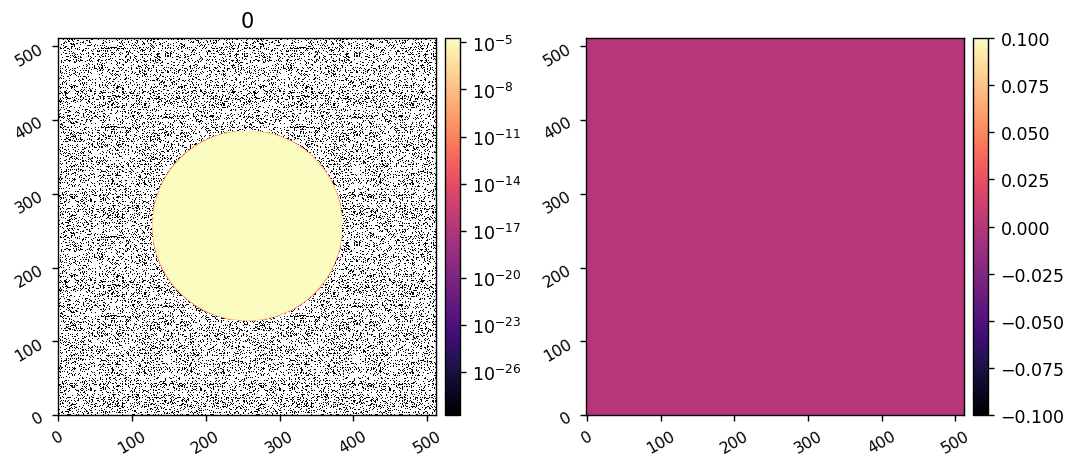

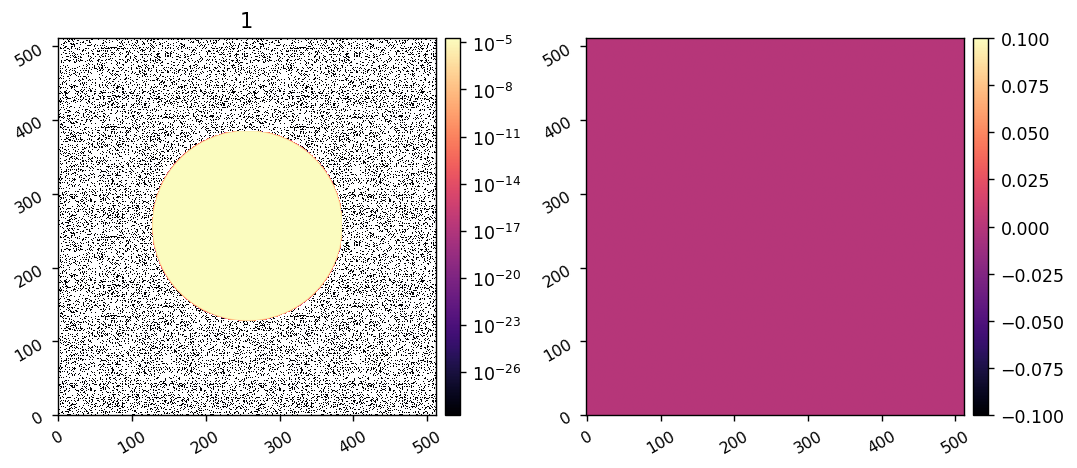

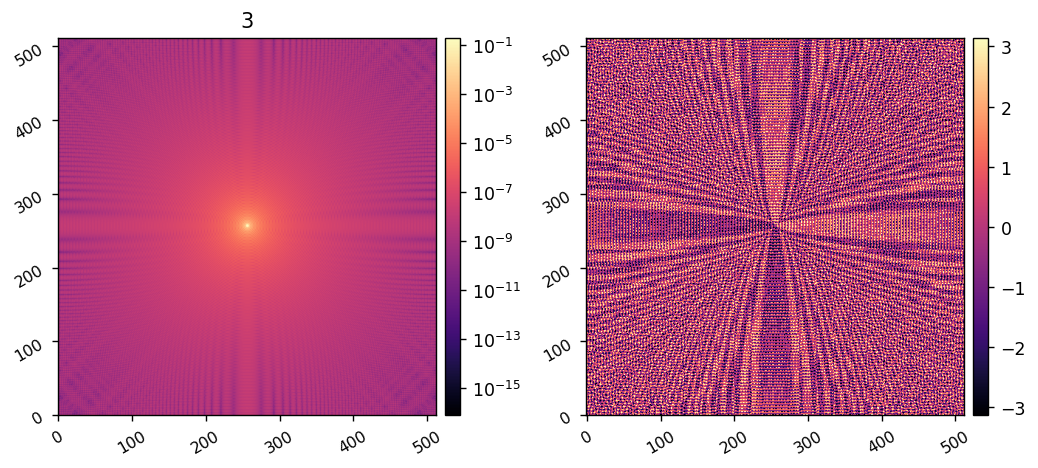

ValueError: vmin must be less or equal to vmax

<Figure size 1250x500 with 4 Axes>

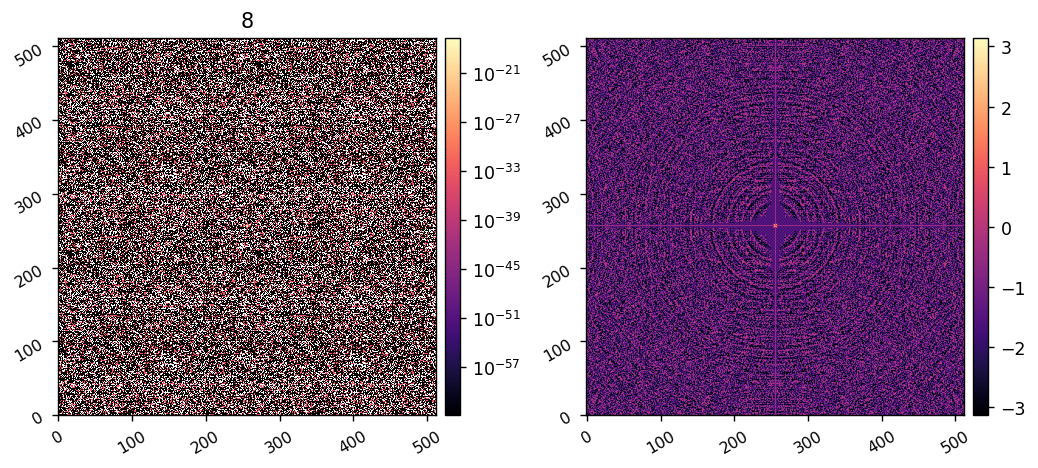

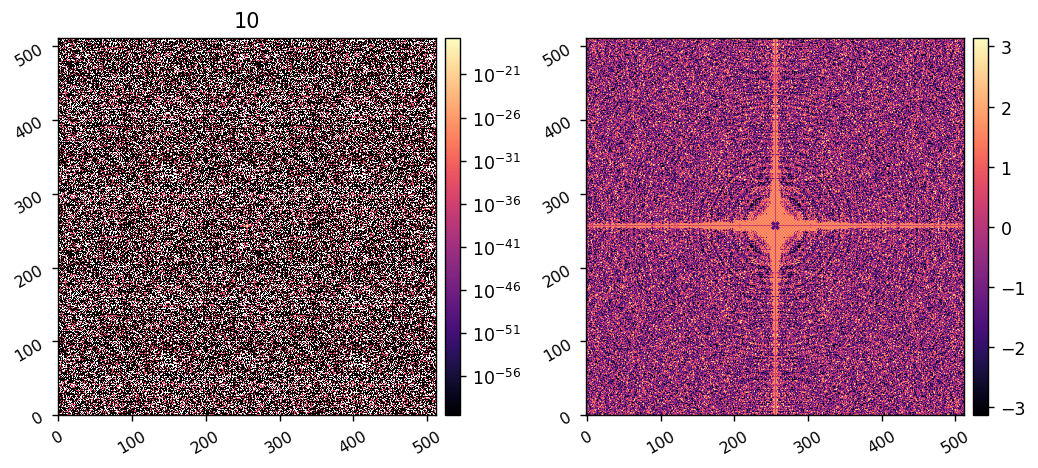

In [24]:
for i,wf in enumerate(wfs):
    misc.myimshow2(wf.intensity, wf.phase, '{:d}'.format(i), lognorm1=True)